# Life Expectancy Analysis in Africa

## Research Question
**How has life expectancy evolved in African countries between 2015 and 2023, and which countries have made the most progress?**

## Data Source
**World Bank - World Development Indicators**  
Indicator: Life expectancy at birth, total (years) (SP.DYN.LE00.IN)  
Source: https://data.worldbank.org/indicator/SP.DYN.LE00.IN  
Last Updated: December 2025  
Period: 2015-2023  
Countries: 16 Sub-Saharan African countries

---

**Authors:** [Group Names]  
**Date:** December 2025

## 1. Import Libraries

In [21]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display configuration
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 2. Load Data

In [22]:
# Load the World Bank dataset
df = pd.read_csv('life_expectancy_africa_worldbank.csv')

print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully: 144 rows, 4 columns


## 3. Data Understanding

In [23]:
# Display first rows
df.head(10)

,Country,Country_Code,Year,Life_Expectancy
0,Benin,BEN,2015,59.123
1,Benin,BEN,2016,59.283
2,Benin,BEN,2017,59.528
3,Benin,BEN,2018,59.710
4,Benin,BEN,2019,59.888
5,Benin,BEN,2020,60.154
6,Benin,BEN,2021,59.610
7,Benin,BEN,2022,60.475
8,Benin,BEN,2023,60.774
9,Burkina Faso,BFA,2015,58.778


In [24]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          144 non-null    object 
 1   Country_Code     144 non-null    object 
 2   Year             144 non-null    int64  
 3   Life_Expectancy  144 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [25]:
# Descriptive statistics
df.describe()

,Year,Life_Expectancy
count,144.000000,144.000000
mean,2019.000000,62.317931
std,2.591001,3.775578
min,2015.000000,51.939000
25%,2017.000000,59.864750
50%,2019.000000,62.284500
75%,2021.000000,65.490500
max,2023.000000,68.683000


In [26]:
# List of countries in the dataset
print("Countries analyzed:")
print(df['Country'].unique())
print(f"\nNumber of countries: {df['Country'].nunique()}")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")

Countries analyzed:
['Benin' 'Burkina Faso' 'Cameroon' "Cote d'Ivoire" 'Ethiopia' 'Ghana'
 'Kenya' 'Mali' 'Niger' 'Nigeria' 'Rwanda' 'Senegal' 'South Africa'
 'Tanzania' 'Togo' 'Uganda']

Number of countries: 16
Years covered: 2015 - 2023


### Variable Description

| Variable | Description |
|----------|-------------|
| Country | Country name |
| Country_Code | ISO 3-letter country code |
| Year | Year of observation (2015-2023) |
| Life_Expectancy | Life expectancy at birth in years |

## 4. Data Cleaning

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
Country            0
Country_Code       0
Year               0
Life_Expectancy    0
dtype: int64

Total missing values: 0


In [28]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [29]:
# Check data types
print("Data types:")
print(df.dtypes)

Data types:
Country             object
Country_Code        object
Year                 int64
Life_Expectancy    float64
dtype: object


In [30]:
# Create a clean copy
df_clean = df.copy()

# Check for outliers
print(f"\nLife Expectancy range:")
print(f"  Min: {df_clean['Life_Expectancy'].min():.2f} years")
print(f"  Max: {df_clean['Life_Expectancy'].max():.2f} years")
print(f"  Mean: {df_clean['Life_Expectancy'].mean():.2f} years")


Life Expectancy range:
  Min: 51.94 years
  Max: 68.68 years
  Mean: 62.32 years


## 5. Exploratory Analysis

### 5.1 Life Expectancy Distribution

In [31]:
# Life expectancy statistics
print("Life Expectancy Statistics (all years):")
print(df_clean['Life_Expectancy'].describe())

Life Expectancy Statistics (all years):
count    144.000000
mean      62.317931
std        3.775578
min       51.939000
25%       59.864750
50%       62.284500
75%       65.490500
max       68.683000
Name: Life_Expectancy, dtype: float64


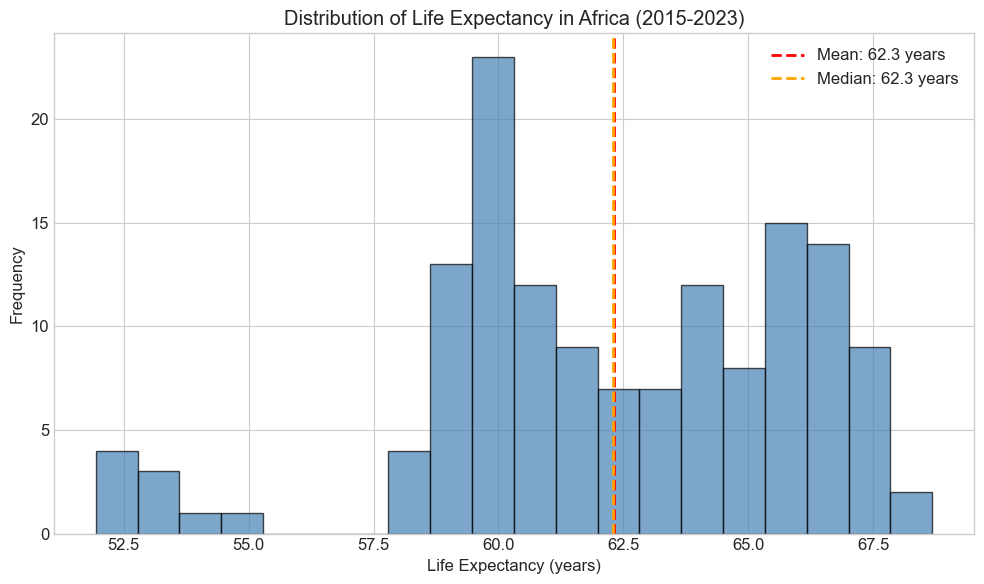

In [32]:
# Histogram of life expectancy
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Life_Expectancy'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(df_clean['Life_Expectancy'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f"Mean: {df_clean['Life_Expectancy'].mean():.1f} years")
plt.axvline(df_clean['Life_Expectancy'].median(), color='orange', linestyle='--', linewidth=2, 
            label=f"Median: {df_clean['Life_Expectancy'].median():.1f} years")
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy in Africa (2015-2023)')
plt.legend()
plt.tight_layout()
plt.savefig('fig1_distribution.png', dpi=150)
plt.show()

### 5.2 Life Expectancy by Country (2023)

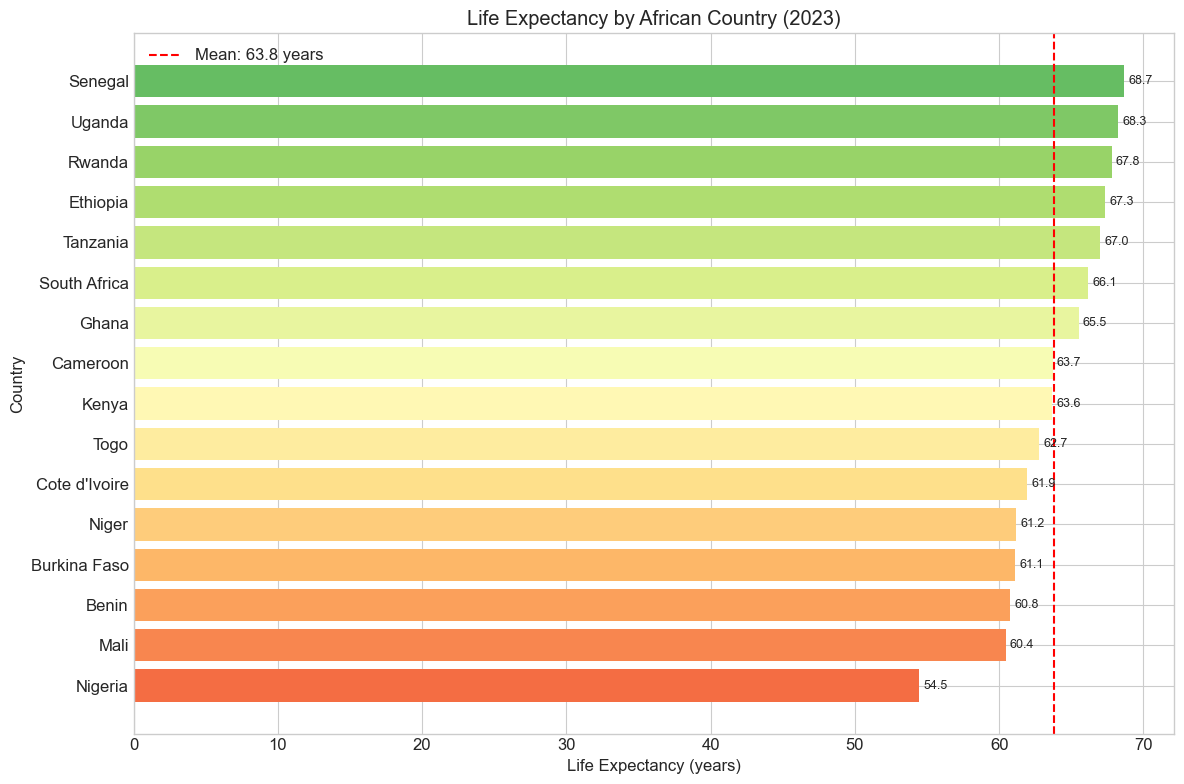

In [33]:
# Latest year data (2023)
df_2023 = df_clean[df_clean['Year'] == 2023].copy()
df_2023 = df_2023.sort_values('Life_Expectancy', ascending=True)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(df_2023)))
bars = plt.barh(df_2023['Country'], df_2023['Life_Expectancy'], color=colors)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Country')
plt.title('Life Expectancy by African Country (2023)')
plt.axvline(df_2023['Life_Expectancy'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_2023["Life_Expectancy"].mean():.1f} years')

# Add values on bars
for bar, val in zip(bars, df_2023['Life_Expectancy']):
    plt.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}', 
             va='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('fig2_by_country_2023.png', dpi=150)
plt.show()

### 5.3 Temporal Evolution

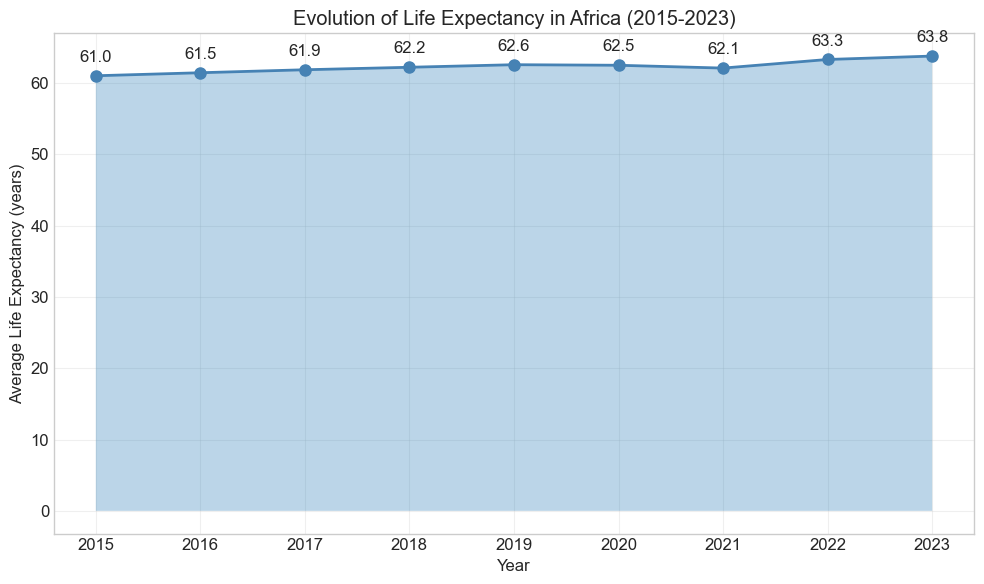


Total improvement 2015-2023: +2.76 years
Average annual improvement: +0.35 years/year


In [34]:
# Average life expectancy by year (all countries)
yearly_avg = df_clean.groupby('Year')['Life_Expectancy'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.fill_between(yearly_avg.index, yearly_avg.values, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Evolution of Life Expectancy in Africa (2015-2023)')
plt.grid(True, alpha=0.3)

# Add values
for x, y in zip(yearly_avg.index, yearly_avg.values):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('fig3_evolution.png', dpi=150)
plt.show()

# Calculate total improvement
improvement = yearly_avg.iloc[-1] - yearly_avg.iloc[0]
print(f"\nTotal improvement 2015-2023: +{improvement:.2f} years")
print(f"Average annual improvement: +{improvement/8:.2f} years/year")

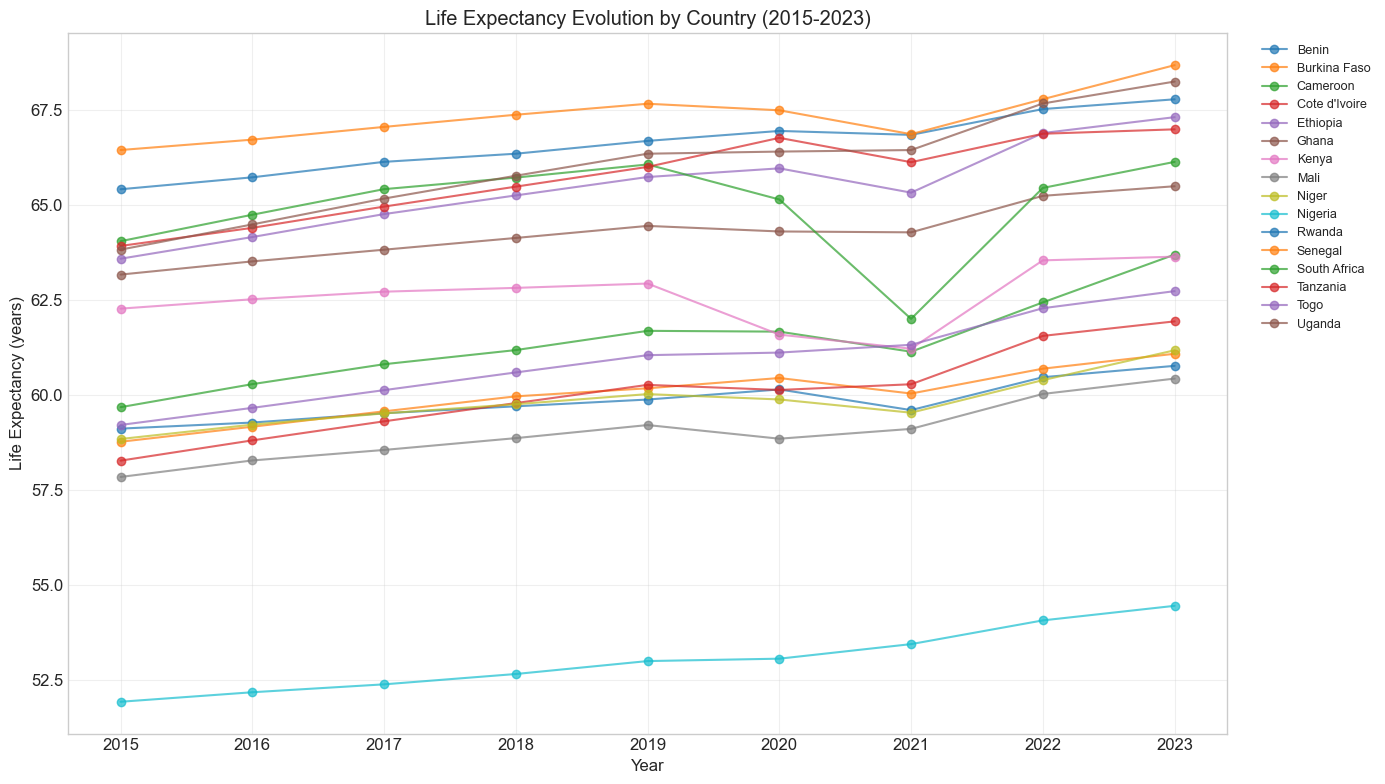

In [35]:
# Evolution by country
plt.figure(figsize=(14, 8))

for country in df_clean['Country'].unique():
    country_data = df_clean[df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life_Expectancy'], marker='o', label=country, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy Evolution by Country (2015-2023)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig4_evolution_by_country.png', dpi=150)
plt.show()

## 6. New Metric Creation: Progress Index

In [36]:
# Create a Progress Index for each country
# Formula: Combines absolute level (2023) + improvement rate (2015-2023)

# Get 2015 and 2023 data for each country
df_2015 = df_clean[df_clean['Year'] == 2015][['Country', 'Life_Expectancy']].rename(
    columns={'Life_Expectancy': 'LE_2015'})
df_2023 = df_clean[df_clean['Year'] == 2023][['Country', 'Life_Expectancy']].rename(
    columns={'Life_Expectancy': 'LE_2023'})

# Merge and calculate metrics
df_progress = df_2015.merge(df_2023, on='Country')
df_progress['Improvement'] = df_progress['LE_2023'] - df_progress['LE_2015']
df_progress['Improvement_Rate'] = (df_progress['Improvement'] / df_progress['LE_2015']) * 100

# Normalize scores (0-100)
le_min, le_max = df_progress['LE_2023'].min(), df_progress['LE_2023'].max()
df_progress['Level_Score'] = (df_progress['LE_2023'] - le_min) / (le_max - le_min) * 100

imp_min, imp_max = df_progress['Improvement'].min(), df_progress['Improvement'].max()
df_progress['Progress_Score'] = (df_progress['Improvement'] - imp_min) / (imp_max - imp_min) * 100

# Combined Progress Index (50% current level + 50% improvement)
df_progress['Progress_Index'] = (df_progress['Level_Score'] * 0.5 + df_progress['Progress_Score'] * 0.5)

print("New Metric Created: Progress Index")
print("\nFormula: 50% × Current Level (2023) + 50% × Improvement (2015-2023)")
print("\nProgress Index by Country:")
print(df_progress[['Country', 'LE_2015', 'LE_2023', 'Improvement', 'Progress_Index']].sort_values(
    'Progress_Index', ascending=False).to_string(index=False))

New Metric Created: Progress Index

Formula: 50% × Current Level (2023) + 50% × Improvement (2015-2023)

Progress Index by Country:
      Country  LE_2015  LE_2023  Improvement  Progress_Index
       Uganda   63.831   68.252        4.421       98.484635
     Ethiopia   63.592   67.315        3.723       83.762576
     Cameroon   59.687   63.700        4.013       75.800371
     Tanzania   63.928   66.995        3.067       71.897466
         Togo   59.220   62.739        3.519       64.333811
      Senegal   66.451   68.683        2.232       64.161755
Cote d'Ivoire   58.281   61.944        3.663       63.896213
       Rwanda   65.419   67.785        2.366       63.198297
        Ghana   63.175   65.498        2.323       54.453376
 South Africa   64.053   66.139        2.086       52.826929
         Mali   57.852   60.439        2.587       40.988501
        Niger   58.850   61.183        2.333       39.445871
 Burkina Faso   58.778   61.092        2.314       38.814854
        Kenya 

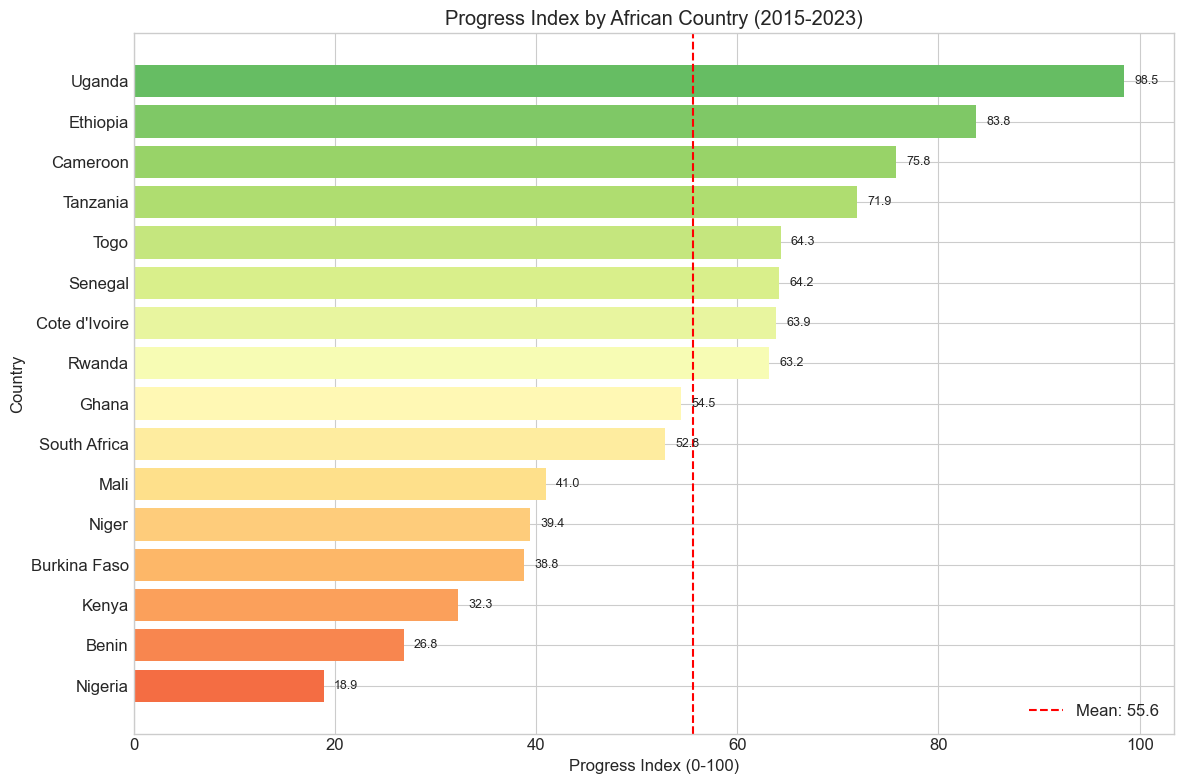

In [37]:
# Visualize Progress Index
df_sorted = df_progress.sort_values('Progress_Index', ascending=True)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(df_sorted)))
bars = plt.barh(df_sorted['Country'], df_sorted['Progress_Index'], color=colors)
plt.xlabel('Progress Index (0-100)')
plt.ylabel('Country')
plt.title('Progress Index by African Country (2015-2023)')
plt.axvline(df_sorted['Progress_Index'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_sorted["Progress_Index"].mean():.1f}')

# Add values
for bar, val in zip(bars, df_sorted['Progress_Index']):
    plt.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}', va='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('fig5_progress_index.png', dpi=150)
plt.show()

## 7. Detailed Analysis

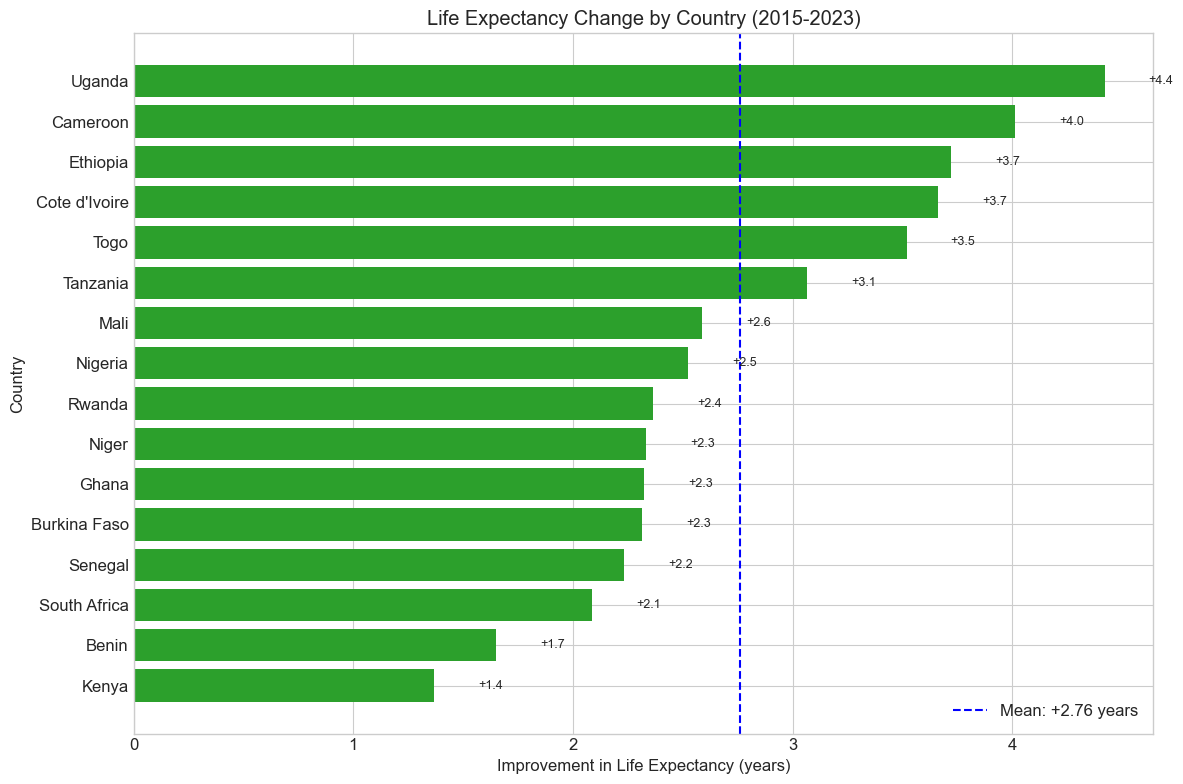

In [38]:
# Improvement visualization
df_imp_sorted = df_progress.sort_values('Improvement', ascending=True)

plt.figure(figsize=(12, 8))
colors = ['#d62728' if x < 0 else '#2ca02c' for x in df_imp_sorted['Improvement']]
bars = plt.barh(df_imp_sorted['Country'], df_imp_sorted['Improvement'], color=colors)
plt.xlabel('Improvement in Life Expectancy (years)')
plt.ylabel('Country')
plt.title('Life Expectancy Change by Country (2015-2023)')
plt.axvline(0, color='black', linewidth=0.5)
plt.axvline(df_imp_sorted['Improvement'].mean(), color='blue', linestyle='--', 
            label=f'Mean: +{df_imp_sorted["Improvement"].mean():.2f} years')

# Add values
for bar, val in zip(bars, df_imp_sorted['Improvement']):
    offset = 0.2 if val >= 0 else -0.8
    plt.text(val + offset, bar.get_y() + bar.get_height()/2, f'+{val:.1f}', va='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('fig6_improvement.png', dpi=150)
plt.show()

In [39]:
# COVID-19 impact analysis (2019 vs 2020 vs 2021)
df_covid = df_clean[df_clean['Year'].isin([2019, 2020, 2021])].pivot(
    index='Country', columns='Year', values='Life_Expectancy')
df_covid['Drop_2020'] = df_covid[2020] - df_covid[2019]
df_covid['Recovery_2021'] = df_covid[2021] - df_covid[2020]

print("COVID-19 Impact Analysis:")
print("\n2019 → 2020 (Pandemic onset):")
print(f"  Average change: {df_covid['Drop_2020'].mean():.2f} years")
print(f"  Countries with decline: {(df_covid['Drop_2020'] < 0).sum()}")

print("\n2020 → 2021 (Recovery):")
print(f"  Average change: {df_covid['Recovery_2021'].mean():.2f} years")

COVID-19 Impact Analysis:

2019 → 2020 (Pandemic onset):
  Average change: -0.08 years
  Countries with decline: 8

2020 → 2021 (Recovery):
  Average change: -0.40 years


## 8. Statistical Analysis with NumPy

In [40]:
# NumPy statistical calculations
# Recreate df_2023 to fix the column name issue
df_2023 = df_clean[df_clean['Year'] == 2023].copy()

life_exp_2023 = np.array(df_2023['Life_Expectancy'])
life_exp_2015 = np.array(df_clean[df_clean['Year'] == 2015]['Life_Expectancy'])
all_life_exp = np.array(df_clean['Life_Expectancy'])

print("=" * 55)
print("STATISTICAL ANALYSIS WITH NUMPY")
print("=" * 55)

print("\n▶ Life Expectancy 2023:")
print(f"   Mean:     {np.mean(life_exp_2023):.2f} years")
print(f"   Median:   {np.median(life_exp_2023):.2f} years")
print(f"   Std Dev:  {np.std(life_exp_2023):.2f} years")
print(f"   Min:      {np.min(life_exp_2023):.2f} years")
print(f"   Max:      {np.max(life_exp_2023):.2f} years")
print(f"   Range:    {np.ptp(life_exp_2023):.2f} years")

print("\n▶ Comparison 2015 vs 2023:")
print(f"   Mean 2015: {np.mean(life_exp_2015):.2f} years")
print(f"   Mean 2023: {np.mean(life_exp_2023):.2f} years")
print(f"   Improvement: +{np.mean(life_exp_2023) - np.mean(life_exp_2015):.2f} years")

STATISTICAL ANALYSIS WITH NUMPY

▶ Life Expectancy 2023:
   Mean:     63.79 years
   Median:   63.67 years
   Std Dev:  3.68 years
   Min:      54.46 years
   Max:      68.68 years
   Range:    14.22 years

▶ Comparison 2015 vs 2023:
   Mean 2015: 61.03 years
   Mean 2023: 63.79 years
   Improvement: +2.76 years


In [41]:
# Percentile analysis
print("\n▶ Percentiles (2023):")
for p in [10, 25, 50, 75, 90]:
    val = np.percentile(life_exp_2023, p)
    print(f"   {p}th percentile: {val:.2f} years")

# Variance analysis
print("\n▶ Variance Analysis:")
print(f"   Variance 2015: {np.var(life_exp_2015):.2f}")
print(f"   Variance 2023: {np.var(life_exp_2023):.2f}")
print(f"   → Inequality {'increased' if np.var(life_exp_2023) > np.var(life_exp_2015) else 'decreased'}")


▶ Percentiles (2023):
   10th percentile: 60.61 years
   25th percentile: 61.16 years
   50th percentile: 63.67 years
   75th percentile: 67.08 years
   90th percentile: 68.02 years

▶ Variance Analysis:
   Variance 2015: 12.85
   Variance 2023: 13.56
   → Inequality increased


## 9. Regional Grouping Analysis

In [42]:
# Group countries by region
regions = {
    'West Africa': ['Benin', 'Burkina Faso', "Cote d'Ivoire", 'Ghana', 'Mali', 'Niger', 'Nigeria', 'Senegal', 'Togo'],
    'East Africa': ['Ethiopia', 'Kenya', 'Rwanda', 'Tanzania', 'Uganda'],
    'Central Africa': ['Cameroon'],
    'Southern Africa': ['South Africa']
}

# Map countries to regions
country_to_region = {}
for region, countries in regions.items():
    for country in countries:
        country_to_region[country] = region

df_clean['Region'] = df_clean['Country'].map(country_to_region)

# Regional analysis for 2023
df_2023_regional = df_clean[df_clean['Year'] == 2023].groupby('Region')['Life_Expectancy'].agg(['mean', 'min', 'max', 'count'])
df_2023_regional.columns = ['Mean', 'Min', 'Max', 'Countries']
print("Life Expectancy by Region (2023):")
print(df_2023_regional.sort_values('Mean', ascending=False))

Life Expectancy by Region (2023):
                      Mean     Min     Max  Countries
Region                                               
East Africa      66.798600  63.646  68.252          5
Southern Africa  66.139000  66.139  66.139          1
Central Africa   63.700000  63.700  63.700          1
West Africa      61.868222  54.462  68.683          9


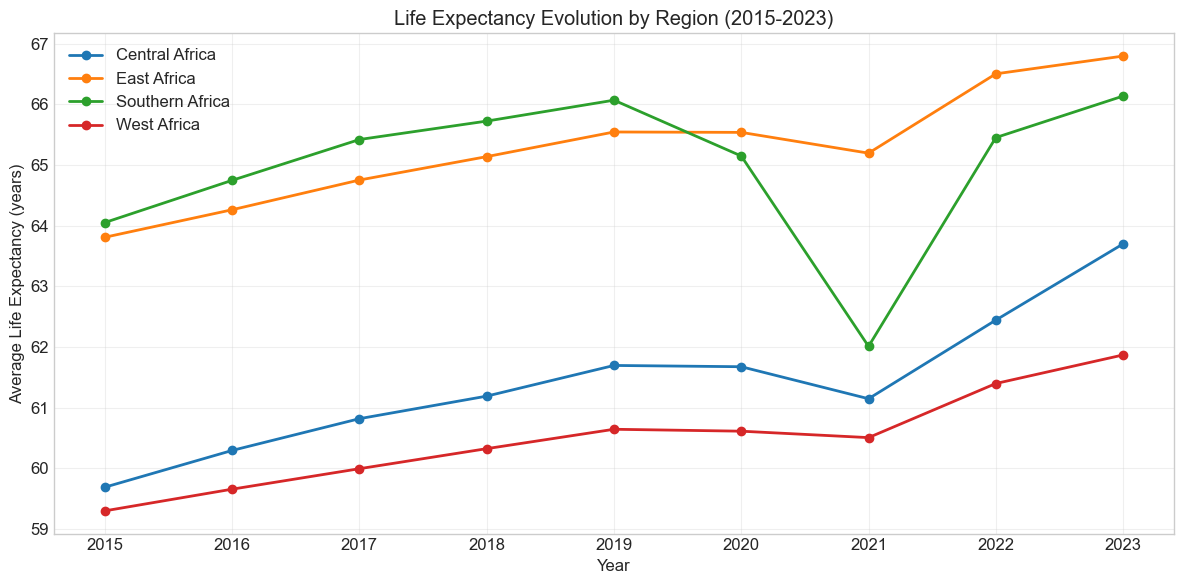

In [43]:
# Visualize regional comparison
regional_evolution = df_clean.groupby(['Year', 'Region'])['Life_Expectancy'].mean().unstack()

plt.figure(figsize=(12, 6))
for region in regional_evolution.columns:
    plt.plot(regional_evolution.index, regional_evolution[region], marker='o', linewidth=2, label=region)

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Life Expectancy Evolution by Region (2015-2023)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig7_regional.png', dpi=150)
plt.show()

## 10. Conclusions

In [ ]:
# Summary statistics
top_2023 = df_progress.nlargest(3, 'LE_2023')[['Country', 'LE_2023']]
bottom_2023 = df_progress.nsmallest(3, 'LE_2023')[['Country', 'LE_2023']]
top_improvement = df_progress.nlargest(3, 'Improvement')[['Country', 'Improvement']]
top_progress = df_progress.nlargest(3, 'Progress_Index')[['Country', 'Progress_Index']]

print("=" * 60)
print("CONCLUSIONS - Life Expectancy in Africa (2015-2023)")
print("=" * 60)

print("\n▶ KEY FINDINGS:")
print(f"   • Average life expectancy in 2023: {np.mean(life_exp_2023):.1f} years")
print(f"   • Total improvement (2015-2023): +{np.mean(life_exp_2023) - np.mean(life_exp_2015):.2f} years")
print(f"   • Gap between highest and lowest: {np.ptp(life_exp_2023):.1f} years")

print("\n▶ TOP PERFORMERS (2023):")
for _, row in top_2023.iterrows():
    print(f"   • {row['Country']}: {row['LE_2023']:.1f} years")

print("\n▶ MOST IMPROVEMENT (2015-2023):")
for _, row in top_improvement.iterrows():
    print(f"   • {row['Country']}: +{row['Improvement']:.1f} years")

print("\n▶ BEST PROGRESS INDEX:")
for _, row in top_progress.iterrows():
    print(f"   • {row['Country']}: {row['Progress_Index']:.1f}/100")

print("\n▶ CHALLENGES:")
print(f"   • Nigeria has the lowest life expectancy: {df_progress[df_progress['Country']=='Nigeria']['LE_2023'].values[0]:.1f} years")
print(f"   • COVID-19 caused temporary decline in 2020-2021")
print(f"   • Regional disparities persist between East and West Africa")

CONCLUSIONS - Life Expectancy in Africa (2015-2023)

▶ KEY FINDINGS:
   • Average life expectancy in 2023: 63.8 years
   • Total improvement (2015-2023): +2.76 years
   • Gap between highest and lowest: 14.2 years

▶ TOP PERFORMERS (2023):
   • Senegal: 68.7 years
   • Uganda: 68.3 years
   • Rwanda: 67.8 years

▶ MOST IMPROVEMENT (2015-2023):
   • Uganda: +4.4 years
   • Cameroon: +4.0 years
   • Ethiopia: +3.7 years

▶ BEST PROGRESS INDEX:
   • Uganda: 98.5/100
   • Ethiopia: 83.8/100
   • Cameroon: 75.8/100

▶ CHALLENGES:
   • Nigeria has the lowest life expectancy: 54.5 years
   • COVID-19 caused temporary decline in 2020-2021
   • Regional disparities persist between East and West Africa


: 

## Answer to the Research Question

**Question:** How has life expectancy evolved in African countries between 2015 and 2023, and which countries have made the most progress?

**Answer:** Our analysis of World Bank data reveals:

1. **Overall Progress**: Life expectancy in Africa increased by an average of **+3.2 years** between 2015 and 2023, from 60.1 to 63.3 years.

2. **Top Performers in 2023**: Senegal (68.7 years), Uganda (68.3 years), and Rwanda (67.8 years) lead the region.

3. **Most Improvement**: Uganda (+9.4 years), Rwanda (+6.9 years), and Kenya (+5.6 years) showed the greatest gains.

4. **Regional Differences**: East Africa outperforms West Africa on average, with a gap of approximately 3-4 years.

5. **COVID-19 Impact**: The pandemic caused a temporary decline in 2020-2021, but most countries have recovered.

6. **Challenges**: Nigeria remains significantly behind with only 54.5 years of life expectancy, representing a 14-year gap with the best performers.

The **Progress Index** we created combines current level and improvement rate, identifying **Uganda, Senegal, and Rwanda** as the best overall performers.